## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import cv2
import json
import re
from pyzbar.pyzbar import decode 
from deepface import DeepFace

## Importing image

In [2]:
path_aadhaar=r"C:\Users\SIDHESH\Desktop\ACADMICS\MACHINE LEARNING STUFF\PROJECTS\Computer Vision\eKYC system\Final\codes\sani_aadhar.jpg"

In [3]:
img_gray=cv2.imread(path_aadhaar,0)

img_rgb=cv2.imread(path_aadhaar)
img_rgb=cv2.cvtColor(img_rgb,cv2.COLOR_BGR2RGB)

## Auto-cropping image

### Applying binary threshold

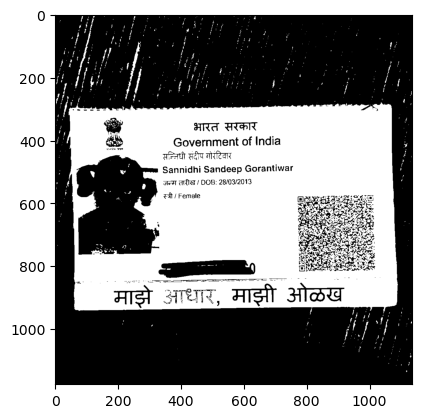

In [4]:
def binary_thresh(img):
    ret, img_thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    
    return img_thresh

img_thresh=binary_thresh(img_gray)
plt.imshow(img_thresh,cmap='gray')

### Finding boundries /contours

In [5]:

def draw_contours(img_thresh):
    global img_gray
    img_cropped = img_gray.copy()
    
    contours, hierarchy = cv2.findContours(img_thresh, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
    external_contours = np.zeros(img_thresh.shape, dtype=np.uint8)

    max_contour_area = 0
    largest_contour_index = -1
    
    for i in range(len(contours)):
        if hierarchy[0][i][3] == -1:  
            contour_area = cv2.contourArea(contours[i])
            if contour_area > max_contour_area:
                max_contour_area = contour_area
                largest_contour_index = i
    
   
    if largest_contour_index != -1:
        cv2.drawContours(external_contours, contours, largest_contour_index, 255, -1)
        
       
        x, y, w, h = cv2.boundingRect(contours[largest_contour_index])
        cv2.rectangle(img_cropped, (x, y), (x + w, y + h), (0, 255, 0), 20)
        
        return (x, y, w, h)
    else:
        return None


In [6]:
x,y,w,h=draw_contours(img_thresh)

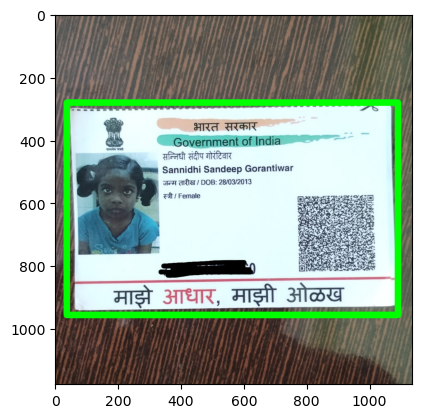

In [7]:
copy=img_rgb.copy()
cv2.rectangle(copy,(x,y),(x+w,y+h),(0,255,0),20)
plt.imshow(copy)

### Final crop

In [8]:
def crop(img_rgb,x,y,w,h):
    roi=img_rgb[y:y+h,x:x+w]
    return roi

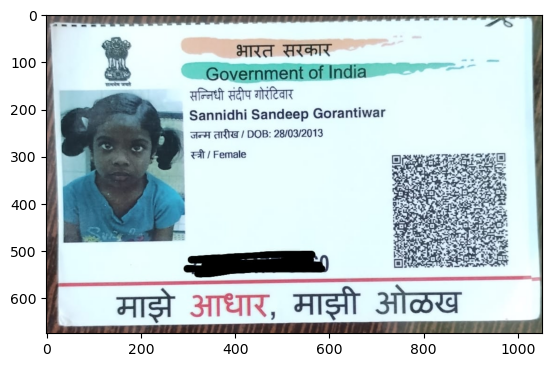

In [9]:
sorted_card=crop(img_rgb,x,y,w,h)
plt.imshow(sorted_card)

In [10]:
to_export=sorted_card.copy()
to_export=cv2.cvtColor(to_export,cv2.COLOR_RGB2BGR)
cv2.imwrite("Aadhaar_cropped.jpg",to_export)

True

## Detecting Face

### Importing cropped aadhaar image

In [11]:
path2=r"C:\Users\SIDHESH\Desktop\ACADMICS\MACHINE LEARNING STUFF\PROJECTS\Computer Vision\eKYC system\Final\codes\Aadhaar_cropped.jpg"

In [12]:
img_rgb_cropped=cv2.imread(path2)
img_rgb_cropped=cv2.cvtColor(img_rgb_cropped,cv2.COLOR_BGR2RGB)

### Importing cascade classifier for face detection

In [13]:
face_cascade_path=r'C:\Users\SIDHESH\Desktop\ACADMICS\MACHINE LEARNING STUFF\Computer vision\Computer-Vision-with-Python\DATA\haarcascades\haarcascade_frontalface_default.xml'
face_cascade=cv2.CascadeClassifier(face_cascade_path)

### Defining function to detect face

In [14]:
def face_detect(img):
    face_points = face_cascade.detectMultiScale(img, scaleFactor=1.02, minNeighbors=5, minSize=(30, 30))
    max_area = 0
    max_x = max_y = max_w = max_h = 0
    
    for (x, y, w, h) in face_points:
        area = w * h
        if area > max_area:
            max_area = area
            max_x, max_y, max_w, max_h = x, y, w, h

    if max_area > 0:
        cv2.rectangle(img, (max_x, max_y), (max_x + max_w, max_y + max_h), (0, 255,0), 10)

    return img, max_x, max_y, max_w, max_h


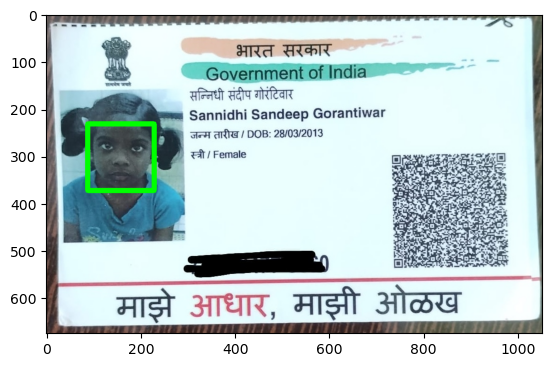

In [15]:
detection,x,y,w,h=face_detect(img_rgb_cropped)
plt.imshow(detection,cmap='gray')

### Cropping the image

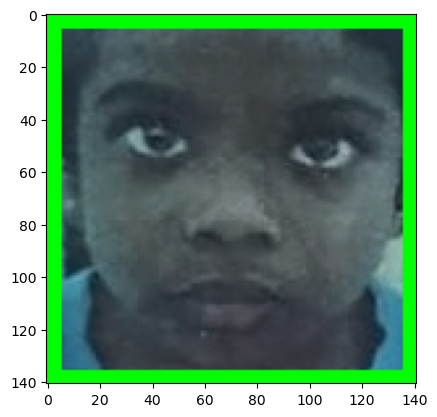

In [16]:
photo=detection[y:y+h,x:x+w]
plt.imshow(photo)

In [17]:
photo_exp=cv2.cvtColor(photo,cv2.COLOR_RGB2BGR)
cv2.imwrite('Photo.png',photo_exp)

True

## Face Recognition

### Importing photo from Aadhaar card and a random photo

In [18]:
pan_photo=r"C:\Users\SIDHESH\Desktop\ACADMICS\MACHINE LEARNING STUFF\PROJECTS\Computer Vision\eKYC system\Final\codes\Photo.png"
random_photo=r"C:\Users\SIDHESH\Pictures\Camera Roll\WIN_20240617_12_53_16_Pro.jpg"

#### checking if photo is of same person

In [19]:
result=DeepFace.verify(img1_path=pan_photo,img2_path=random_photo,enforce_detection=False)
print(result)

{'verified': True, 'distance': 0.5938283139266047, 'threshold': 0.68, 'model': 'VGG-Face', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 0, 'y': 0, 'w': 141, 'h': 141, 'left_eye': None, 'right_eye': None}, 'img2': {'x': 482, 'y': 179, 'w': 388, 'h': 388, 'left_eye': (758, 338), 'right_eye': (592, 330)}}, 'time': 10.06}


## Extracting textual details

In [20]:
path3=r"C:\Users\SIDHESH\Desktop\ACADMICS\MACHINE LEARNING STUFF\PROJECTS\Computer Vision\eKYC system\Final\codes\Aadhaar_cropped.jpg"
img_rgb_cropped=cv2.imread(path3)

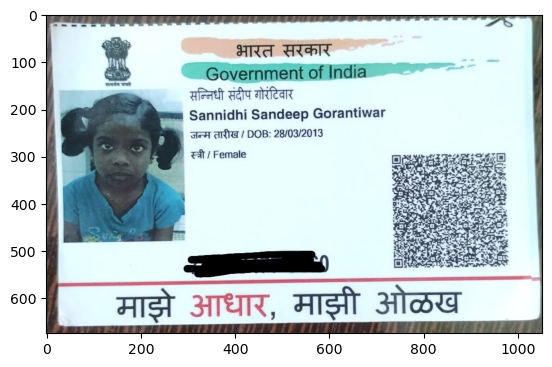

In [21]:
img_rgb_cropped=cv2.cvtColor(img_rgb_cropped,cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb_cropped)

In [36]:
def find_qr(img):
    copy = img.copy()
    kernel = np.ones((10, 10), np.uint8) 
    
    gray = cv2.cvtColor(copy, cv2.COLOR_RGB2GRAY)
    
    blur = cv2.GaussianBlur(gray, (9, 9), 1)
    
    _,thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    dilated = cv2.dilate(thresh, kernel, iterations=2)
    
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

    close = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)
    
    cnts = cv2.findContours(close, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    
    ROI = None
    
    for c in cnts:
        peri = cv2.arcLength(c, True)
        
        approx = cv2.approxPolyDP(c, 0.04 * peri, True)
        
        x, y, w, h = cv2.boundingRect(approx)
        
        area = cv2.contourArea(c)
        
        ar = w / float(h)
        
        if len(approx) == 4 and area > 1000 and (0.85 < ar < 1.3):
            cv2.rectangle(img, (x, y), (x + w, y + h), (36, 255, 12), 3)
            
            ROI = copy[y:y + h, x:x + w]
            break  
    
    if ROI is None:
        return False
    
    return ROI

In [37]:
location=r"C:\Users\SIDHESH\Desktop\ACADMICS\MACHINE LEARNING STUFF\PROJECTS\Computer Vision\eKYC system\Final\codes\Aadhaar_cropped.jpg"
img=cv2.imread(location)

In [38]:
qr=find_qr(img)
if(type(qr)!=bool):
    qr1=qr
    plt.imshow(qr1,cmap='gray')
else:
    breadth,length,_=img.shape
    roi_length=int(length/2)
    roi_bredth=int(breadth/1.2)
    copy2=img
    qr2=copy2[:,roi_length:length]

In [39]:
qr=find_qr(img_rgb_cropped)
if(type(qr)!=bool):
    qr1=qr
    plt.imshow(qr1,cmap='gray')
else:
    breadth,length,_=img_rgb_cropped.shape
    roi_length=int(length/2)
    roi_bredth=int(breadth/1.2)
    copy2=img_rgb_cropped
    qr2=copy2[:,roi_length:length]

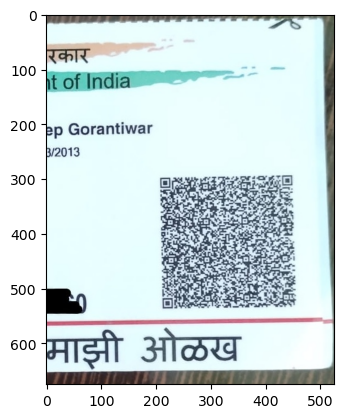

In [28]:
plt.imshow(qr2)

### Decoding data

In [40]:

data=decode(qr2)

if(data):
    x=data[0]
    x=list(x)
    data_useful=x[0]
    byte_data=data_useful
    json_str = byte_data.decode('utf-8')

    patterns = {
        'name': r'n="([^"]+)"',
        'uid': r'u="([^"]+)"',
        'gender': r'g="([^"]+)"',
        'dob': r'd="([^"]+)"',
        'address': r'a="([^"]+)"'
    }

    extracted_data = {key: re.search(pattern, json_str).group(1) for key, pattern in patterns.items()}
    print(f"Name: {extracted_data['name']}")
    print(f"UID: {extracted_data['uid']}")
    print(f"Gender: {extracted_data['gender']}")
    print(f"DOB: {extracted_data['dob']}")
    print(f"Address: {extracted_data['address']}")
    


Name: Sannidhi Sandeep Gorantiwar
UID: xxxxxxxx8160
Gender: F
DOB: 28-03-2013
Address: gajanan mandir road,sneh nagar sai mandir ward,near shitla mata mandir,Chandrapur,Chandrapur,Maharashtra,442401


## Organising data into Pandas dataframe

In [41]:
import pandas as pd

In [42]:
extracted_data

{'name': 'Sannidhi Sandeep Gorantiwar',
 'uid': 'xxxxxxxx8160',
 'gender': 'F',
 'dob': '28-03-2013',
 'address': 'gajanan mandir road,sneh nagar sai mandir ward,near shitla mata mandir,Chandrapur,Chandrapur,Maharashtra,442401'}

In [43]:
dataframe=pd.DataFrame([extracted_data])
dataframe

,name,uid,gender,dob,address
0,Sannidhi Sandeep Gorantiwar,xxxxxxxx8160,F,28-03-2013,"gajanan mandir road,sneh nagar sai mandir ward..."


In [44]:
dataframe['Photo']=[photo]

In [45]:
dataframe

,name,uid,gender,dob,address,Photo
0,Sannidhi Sandeep Gorantiwar,xxxxxxxx8160,F,28-03-2013,"gajanan mandir road,sneh nagar sai mandir ward...","[[[0, 255, 0], [0, 255, 0], [0, 255, 0], [0, 2..."
